<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/6_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

In [1]:
# download data
!wget https://archive.ics.uci.edu/static/public/591/gender+by+name.zip
!unzip gender+by+name.zip

--2023-12-05 06:06:51--  https://archive.ics.uci.edu/static/public/591/gender+by+name.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘gender+by+name.zip’

gender+by+name.zip      [     <=>            ]   3.60M  2.97MB/s    in 1.2s    

2023-12-05 06:06:53 (2.97 MB/s) - ‘gender+by+name.zip’ saved [3774735]

Archive:  gender+by+name.zip
 extracting: name_gender_dataset.csv  


In [2]:
import pandas as pd
df = pd.read_csv('name_gender_dataset.csv')
unique_gender_df = df.drop_duplicates(['Name'])
names = unique_gender_df['Name'].values
genders = unique_gender_df['Gender'].values

In [3]:
df

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


In [4]:
df_filtered = df[df['Count']>10]
df_filtered

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
83518,Zmarion,M,11,3.010410e-08
83519,Zonnie,M,11,3.010410e-08
83520,Zyell,M,11,3.010410e-08
83521,Zyquavion,M,11,3.010410e-08


In [5]:
df['Name']=="James"

0          True
1         False
2         False
3         False
4         False
          ...  
147264    False
147265    False
147266    False
147267    False
147268    False
Name: Name, Length: 147269, dtype: bool

In [6]:
df[df['Name']=="James"]

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1615,James,F,23963,0.000066


In [7]:
idx = 10001

names[idx], genders[idx]

('Yitzchak', 'M')

In [8]:
genders

array(['M', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)

In [9]:
# first, convert every name into lower case
names_list = names.tolist()
names_list = [name.lower() for name in names_list]
names_list


['james',
 'john',
 'robert',
 'michael',
 'william',
 'mary',
 'david',
 'joseph',
 'richard',
 'charles',
 'thomas',
 'christopher',
 'daniel',
 'matthew',
 'elizabeth',
 'patricia',
 'jennifer',
 'anthony',
 'george',
 'linda',
 'barbara',
 'donald',
 'paul',
 'mark',
 'andrew',
 'steven',
 'kenneth',
 'edward',
 'joshua',
 'margaret',
 'brian',
 'kevin',
 'jessica',
 'sarah',
 'susan',
 'timothy',
 'dorothy',
 'jason',
 'ronald',
 'helen',
 'ryan',
 'jeffrey',
 'karen',
 'nancy',
 'betty',
 'lisa',
 'jacob',
 'nicholas',
 'ashley',
 'eric',
 'frank',
 'gary',
 'anna',
 'stephen',
 'jonathan',
 'sandra',
 'emily',
 'amanda',
 'kimberly',
 'michelle',
 'donna',
 'justin',
 'laura',
 'ruth',
 'carol',
 'brandon',
 'larry',
 'scott',
 'melissa',
 'stephanie',
 'benjamin',
 'raymond',
 'samuel',
 'rebecca',
 'deborah',
 'gregory',
 'sharon',
 'kathleen',
 'amy',
 'cynthia',
 'alexander',
 'patrick',
 'jack',
 'henry',
 'angela',
 'shirley',
 'emma',
 'catherine',
 'katherine',
 'virgini

In [10]:
# What kind of unique characters exist in our names?

name_example = names_list[100]
name_example
for char in name_example:
  print(char)

entire_chars = [char for name in names_list for char in name]
len(names_list), len(entire_chars)

a
d
a
m


(133910, 912815)

In [11]:
unique_chars = list(set(entire_chars))
unique_chars

['w',
 '@',
 'r',
 '[',
 'x',
 'd',
 '0',
 'c',
 'q',
 'o',
 'ö',
 'v',
 'm',
 'l',
 'k',
 'i',
 '"',
 '9',
 '5',
 '7',
 'a',
 '1',
 'n',
 'e',
 'j',
 'z',
 'u',
 'à',
 'b',
 't',
 ';',
 '(',
 ')',
 '…',
 'œ',
 's',
 'h',
 '.',
 '&',
 'p',
 '8',
 '¡',
 '?',
 ',',
 "'",
 'y',
 'f',
 '/',
 '-',
 'g']

In [12]:
special_chars = '?'
special_names = [name for name in names_list if special_chars in name]
special_names

['de?anne', 'rene?', 'sher?ee']

In [13]:
unique_chars

['w',
 '@',
 'r',
 '[',
 'x',
 'd',
 '0',
 'c',
 'q',
 'o',
 'ö',
 'v',
 'm',
 'l',
 'k',
 'i',
 '"',
 '9',
 '5',
 '7',
 'a',
 '1',
 'n',
 'e',
 'j',
 'z',
 'u',
 'à',
 'b',
 't',
 ';',
 '(',
 ')',
 '…',
 'œ',
 's',
 'h',
 '.',
 '&',
 'p',
 '8',
 '¡',
 '?',
 ',',
 "'",
 'y',
 'f',
 '/',
 '-',
 'g']

In [15]:
print(sorted(unique_chars)[30:40])
print(unique_chars[30:40])# sorted does not change the original input
# sorted(alist) make a new variable

['l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u']
[';', '(', ')', '…', 'œ', 's', 'h', '.', '&', 'p']


In [16]:
# tip: sorting the list in Python
unique_chars.sort() # this will sort the list and save it to the original variable
print(unique_chars[30:40])

# if you run below, unique_chars will become none
# unique_chars = unique_chars.sort() # .sort() returns None
# print(unique_chars[30:40])


['l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u']


In [17]:
unique_chars = sorted(unique_chars) # this is our vocabulary
if unique_chars[0] != '<pad>':
  unique_chars = ['<pad>', '<start>', '<end>'] + unique_chars

char = 'c'
# Get the index of this char in the vocab
char_idx = unique_chars.index(char)
char_idx, unique_chars[char_idx]

# alist.index usually takes bit long
# to make it faster, we use dictionary
char2idx = {}

for char in unique_chars:
  char2idx[char] = unique_chars.index(char)
print(char2idx)
char2idx[char] # now we can get the index of the char by indexing dictionary

char2idx = {char: idx for idx, char in enumerate(unique_chars)}
print(char2idx)

{'<pad>': 0, '<start>': 1, '<end>': 2, '"': 3, '&': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '5': 14, '7': 15, '8': 16, '9': 17, ';': 18, '?': 19, '@': 20, '[': 21, 'a': 22, 'b': 23, 'c': 24, 'd': 25, 'e': 26, 'f': 27, 'g': 28, 'h': 29, 'i': 30, 'j': 31, 'k': 32, 'l': 33, 'm': 34, 'n': 35, 'o': 36, 'p': 37, 'q': 38, 'r': 39, 's': 40, 't': 41, 'u': 42, 'v': 43, 'w': 44, 'x': 45, 'y': 46, 'z': 47, '¡': 48, 'à': 49, 'ö': 50, 'œ': 51, '…': 52}
{'<pad>': 0, '<start>': 1, '<end>': 2, '"': 3, '&': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '5': 14, '7': 15, '8': 16, '9': 17, ';': 18, '?': 19, '@': 20, '[': 21, 'a': 22, 'b': 23, 'c': 24, 'd': 25, 'e': 26, 'f': 27, 'g': 28, 'h': 29, 'i': 30, 'j': 31, 'k': 32, 'l': 33, 'm': 34, 'n': 35, 'o': 36, 'p': 37, 'q': 38, 'r': 39, 's': 40, 't': 41, 'u': 42, 'v': 43, 'w': 44, 'x': 45, 'y': 46, 'z': 47, '¡': 48, 'à': 49, 'ö': 50, 'œ': 51, '…': 52}


In [18]:
def convert_str_to_list_of_integers(astr):
  return [1] + [char2idx[char] for char in astr] + [2]
  # output = []
  # for char in astr:
  #   converted_idx = char2idx[char]
  #   output.append(converted_idx)

convert_str_to_list_of_integers('robert')


[1, 39, 36, 23, 26, 39, 41, 2]

In [19]:
# convert every name into the list of integer
names_converted = [convert_str_to_list_of_integers(name) for name in names_list]


In [20]:
def decode_name(name_in_ints, unique_chars):
  # name_in_ints = [28, 33, 26, 32]
  output = []
  for index in name_in_ints:
    decoded_character = unique_chars[index]
    output.append(decoded_character)
  return ''.join(output)

decode_name(names_converted[3], unique_chars)


'<start>michael<end>'

In [21]:
names_converted[1]

[1, 31, 36, 29, 35, 2]

In [22]:
import torch
# make it to a tensor
idx = 100
conv_name = names_converted[idx]
name_tensor = torch.tensor(conv_name)
conv_name, torch.tensor(conv_name)


([1, 22, 25, 22, 34, 2], tensor([ 1, 22, 25, 22, 34,  2]))

In [23]:
# convert this integer tensor into a sequence of vector
import torch.nn as nn

emb_size = 3
char_emb_layer = nn.Embedding(len(unique_chars), emb_size)

char_emb = char_emb_layer(name_tensor)
char_emb

tensor([[-0.4947,  1.4259, -0.2106],
        [-1.0372, -0.7751,  0.1495],
        [ 1.1381,  0.0811,  2.2564],
        [-1.0372, -0.7751,  0.1495],
        [ 0.6329, -1.1959, -1.9268],
        [-0.1964, -0.7434,  0.9471]], grad_fn=<EmbeddingBackward0>)

In [54]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    # inherit from the superclass
    super().__init__()
    # hidden_size means the dimension of RNN's output (and also the input for the next step)
    self.hidden_to_hidden = nn.Linear(hidden_size, hidden_size) #WX +b
    self.input_to_hidden = nn.Linear(input_size, hidden_size) #WX + b
    self.hidden_size = hidden_size

  def forward(self, inputs, prev_hidden=None):
    seq_len = inputs.shape[0]
    # print(f'seq_len is {seq_len}')
    # if prev_hidden is None:
    if not isinstance(prev_hidden, torch.Tensor):
      prev_hidden = torch.zeros(self.hidden_size).to(inputs.device)
    # goal: calculate the hidden state for each timestep in the sequence
    outputs = []
    for i in range(seq_len):
      # do something
      # current_char = inputs[i:i+1] # this is same with seq_len[i].unsqueeze(0)
      current_char = inputs[i]
      current_hidden = self.input_to_hidden(current_char)
      temp_prev_hidden = self.hidden_to_hidden(prev_hidden)
      # print(current_hidden)
      # print(temp_prev_hidden)
      current_hidden = current_hidden + temp_prev_hidden
      current_hidden_act = torch.tanh(current_hidden)
      prev_hidden = current_hidden_act # define current output to the next input
      # print(current_hidden_act)
      outputs.append(current_hidden_act)
    return torch.stack(outputs, dim=0)

rnn_model = RNN(input_size=emb_size, hidden_size=7)

# rnn_model.input_to_hidden(char_emb_layer(name_tensor))
print(char_emb.shape)
out = rnn_model(char_emb)
print(out.shape)

torch.Size([6, 3])
torch.Size([6, 7])


In [25]:
class LanguageModel(nn.Module):
  def __init__(self, vocab_size, emb_size, hidden_size):
    # inherit from the superclass
    super().__init__()

    self.char_emb_layer = nn.Embedding(vocab_size, emb_size)
    self.rnn = RNN(emb_size, hidden_size)
    self.rnn2 = RNN(hidden_size, hidden_size)
    self.logit_proj = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    embs = self.char_emb_layer(x)
    rnn_hidden = self.rnn(embs)
    rnn_hidden = self.rnn2(rnn_hidden)
    logit = self.logit_proj(rnn_hidden)
    return logit.softmax(dim=-1)

torch.manual_seed(0)
model = LanguageModel(len(unique_chars), emb_size=32, hidden_size=64)
out = model(name_tensor[:-1])
out

tensor([[0.0245, 0.0207, 0.0201, 0.0201, 0.0170, 0.0205, 0.0232, 0.0214, 0.0196,
         0.0166, 0.0234, 0.0182, 0.0154, 0.0180, 0.0172, 0.0198, 0.0146, 0.0133,
         0.0200, 0.0133, 0.0162, 0.0246, 0.0204, 0.0162, 0.0212, 0.0173, 0.0189,
         0.0187, 0.0175, 0.0252, 0.0177, 0.0152, 0.0287, 0.0229, 0.0193, 0.0207,
         0.0163, 0.0186, 0.0122, 0.0161, 0.0187, 0.0159, 0.0174, 0.0161, 0.0216,
         0.0186, 0.0123, 0.0190, 0.0230, 0.0151, 0.0217, 0.0212, 0.0185],
        [0.0176, 0.0210, 0.0238, 0.0198, 0.0194, 0.0188, 0.0215, 0.0180, 0.0175,
         0.0186, 0.0271, 0.0143, 0.0184, 0.0153, 0.0186, 0.0155, 0.0221, 0.0181,
         0.0112, 0.0172, 0.0171, 0.0178, 0.0170, 0.0116, 0.0163, 0.0195, 0.0262,
         0.0191, 0.0180, 0.0289, 0.0165, 0.0137, 0.0151, 0.0152, 0.0223, 0.0248,
         0.0220, 0.0186, 0.0165, 0.0208, 0.0209, 0.0241, 0.0187, 0.0185, 0.0208,
         0.0144, 0.0228, 0.0151, 0.0182, 0.0136, 0.0183, 0.0240, 0.0199],
        [0.0273, 0.0176, 0.0202, 0.0198, 0

In [26]:
def get_nll_loss(pred, target, eps=1e-8):
  prob_of_correct_class = pred[torch.arange(len(target)), target]
  return -torch.log(prob_of_correct_class + eps).mean()


input_seq = name_tensor[:-1] # excluding end token
target_seq = name_tensor[1:] # excluding start token

prob = model(input_seq)
loss = get_nll_loss(prob, target_seq)
loss

tensor(3.8750, grad_fn=<NegBackward0>)

In [27]:
from tqdm.auto import tqdm
optimizer = torch.optim.Adam(model.parameters())
device = 'cuda'
model.to(device)
loss_records = []
for name in tqdm(names_converted):
  name_tensor = torch.tensor(name)
  input_seq = name_tensor[:-1] # excluding end token
  target_seq = name_tensor[1:] # excluding start token

  prob = model(input_seq.to(device))
  loss = get_nll_loss(prob, target_seq)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  loss_records.append(loss.item())


  0%|          | 0/133910 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [29]:
import matplotlib.pyplot as plt

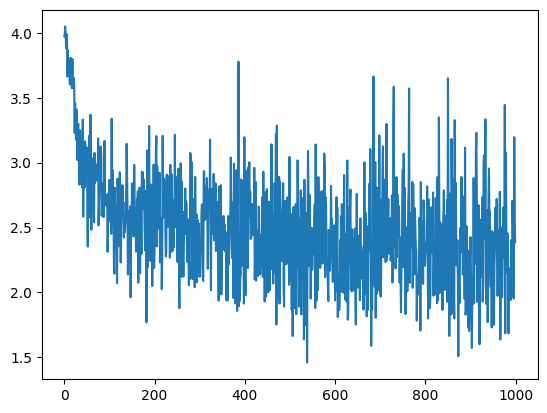

In [34]:
plt.plot(loss_records[:1000])

In [81]:
# embs = self.char_emb_layer(x)
# rnn_hidden = self.rnn(embs)
# rnn_hidden = self.rnn2(rnn_hidden)
# logit = self.logit_proj(rnn_hidden)
# return logit.softmax(dim=-1)

model = model.to('cpu')

# Let's make inference code
# Inference starts with <start> token

def generate_name(model, char2idx, unique_chars):
  current_token = torch.LongTensor([char2idx['<start>']]) # index of <start> token is 1
  # print(current_token)
  rnn_hidden = torch.zeros(1, model.rnn.hidden_size)
  rnn_hidden2 = torch.zeros(1, model.rnn2.hidden_size)

  outputs = []
  for i in range(30):
    embs = model.char_emb_layer(current_token)
    # print(embs)
    rnn_hidden = model.rnn(embs, rnn_hidden[-1])
    rnn_hidden2 = model.rnn2(rnn_hidden, rnn_hidden2[-1])
    logit = model.logit_proj(rnn_hidden2)

    # rnn_hidden = rnn_hidden[-1] # select only last hidden state
    # rnn_hidden2 = rnn_hidden2[-1]

    prob = logit.softmax(dim=-1)
    # we can sample the token from the probability distribution
    selected_idx = prob.multinomial(1)
    selected_chars = unique_chars[selected_idx]
    # print(f"Selected token is {selected_chars}")
    current_token = selected_idx[0]
    if selected_chars == "<end>":
      break
    outputs.append(selected_chars)
    # print(current_token)
  print(outputs)
  return ''.join(outputs)



generate_name(model, char2idx, unique_chars)

['v', 'o', 'r', 'o', 'r', 'i']


'vorori'

In [90]:
generate_name(model, char2idx, unique_chars)

['a', 'i', 't', 'h', 'e', 'a', 'n']


'aithean'

In [73]:
embs.shape

torch.Size([1, 32])

In [66]:
model.rnn(embs, rnn_hidden)

tensor([[[ 0.9431,  0.9999, -0.9652, -1.0000, -0.6838,  0.8834, -0.9997,
           0.5471,  0.9970, -0.7480,  0.9993,  0.1587, -0.5139, -0.9205,
          -0.9818, -0.9998, -0.5095,  0.9403,  0.9989,  0.4459,  0.8063,
           0.2302,  0.3041,  0.9345, -0.8753, -0.9645, -1.0000, -0.8817,
          -0.8040, -0.9999,  0.8887,  0.2388,  0.7984,  0.0205,  0.9483,
           0.6966,  0.9851,  0.3728,  0.9851, -0.8893, -0.9837,  0.9567,
          -0.0663,  0.9996, -0.9999,  0.4528, -0.8820,  0.9989,  0.9809,
           0.9478, -0.9988,  0.3405,  0.9777,  0.9925, -0.9964, -0.9998,
           0.9815, -0.3688,  0.9987, -0.9571,  0.9298,  1.0000, -0.9719,
           0.6379]]], grad_fn=<StackBackward0>)

In [62]:
# save the current parameters
model_state = model.state_dict()
torch.save(model_state, 'model.pt')

In [61]:
model_state['rnn.input_to_hidden.weight']

tensor([[-0.6444, -0.5267,  0.1856,  ..., -0.0695,  0.3538,  0.0411],
        [-0.0638,  0.4291, -0.2435,  ...,  0.6378,  0.4398,  0.6400],
        [ 0.2490, -0.1573,  0.3177,  ..., -0.0915,  0.5067,  0.3020],
        ...,
        [-0.1542, -0.1726, -0.5597,  ..., -0.7146, -0.2679,  0.0415],
        [-0.1206,  0.3545,  0.0039,  ..., -0.1548, -0.0319,  0.0935],
        [-0.2597,  0.1104, -0.3139,  ...,  0.1240, -0.2982, -0.3250]])

In [63]:
model = LanguageModel(len(unique_chars), emb_size=32, hidden_size=64)
model_state = torch.load('model.pt')
model.load_state_dict(model_state)

<All keys matched successfully>

In [ ]:
for _ in range(100):
  selected_idx = prob.multinomial(1) # sample one index from the given probability distribution
  print(f"Selected token is {unique_chars[selected_idx]}")


In [47]:
char2idx

{'<pad>': 0,
 '<start>': 1,
 '<end>': 2,
 '"': 3,
 '&': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '/': 11,
 '0': 12,
 '1': 13,
 '5': 14,
 '7': 15,
 '8': 16,
 '9': 17,
 ';': 18,
 '?': 19,
 '@': 20,
 '[': 21,
 'a': 22,
 'b': 23,
 'c': 24,
 'd': 25,
 'e': 26,
 'f': 27,
 'g': 28,
 'h': 29,
 'i': 30,
 'j': 31,
 'k': 32,
 'l': 33,
 'm': 34,
 'n': 35,
 'o': 36,
 'p': 37,
 'q': 38,
 'r': 39,
 's': 40,
 't': 41,
 'u': 42,
 'v': 43,
 'w': 44,
 'x': 45,
 'y': 46,
 'z': 47,
 '¡': 48,
 'à': 49,
 'ö': 50,
 'œ': 51,
 '…': 52}

In [45]:
torch.set_printoptions(sci_mode=False)